<a href="https://colab.research.google.com/github/ColstonBod-oy/CCS7-TensorFlowDemos/blob/main/models/clustering/CCS7_Clustering_Model_Demo_(E_M).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using TensorFlow to solve a Clustering Problem (E-M)**

This is the second clustering activity looks at how Clustering Models are used to group a set of unsupervised data into different clusters using the E-M method. We will be looking at two smaller sets of code to showcase how clustering is done and how it is used to cluster a dataset based on the features of the given data. We will be looking at how clustering is accomplished with the use of the K-Means and E-M methods.

**Each of the guide questions must be answered in 100 to 200 words each.**

**Make sure to click "File" and then "Save a Copy in Drive" before making any changes to the demo.**

# **Clustering using E-M**

Here, we will look at clustering a given set of data using a different algorithm called the Expectation-Maximization algorithm. Same as before, start by importing the required libaries needed for our given code.

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random

Here, we generate a random set of data that we will attempt to cluster for our demo. In this case, we will generate 200 samples of data to that will be processed. We will then be plotting these 200 samples into 2 clusters.
*   **Guide Question 1:** What is the **Expectation-Maximization algorithm**? How does it differ from the K-Means algorithm for clustering? What use cases is it best used for and why?
*   **Guide Question 2:** What is the **process of the E-M algorithm**? What steps do we take for this algorithm when we would like to cluster a set of data?

In [ ]:
m1 = [1,1]
m2 = [7,7]
cov1 = [[3, 2], [2, 3]]
cov2 = [[2, -1], [-1, 2]]
x = np.random.multivariate_normal(m1, cov1, size=(200,))
y = np.random.multivariate_normal(m2, cov2, size=(200,))
d = np.concatenate((x, y), axis=0)

Here, we will now plot our given generated data so we can attempt to cluster it with the E-M algorithm. We will then display the ground truth of our data.
*   **Guide Question 3:** What is the **ground truth**? What type of data does this identify in our given model?

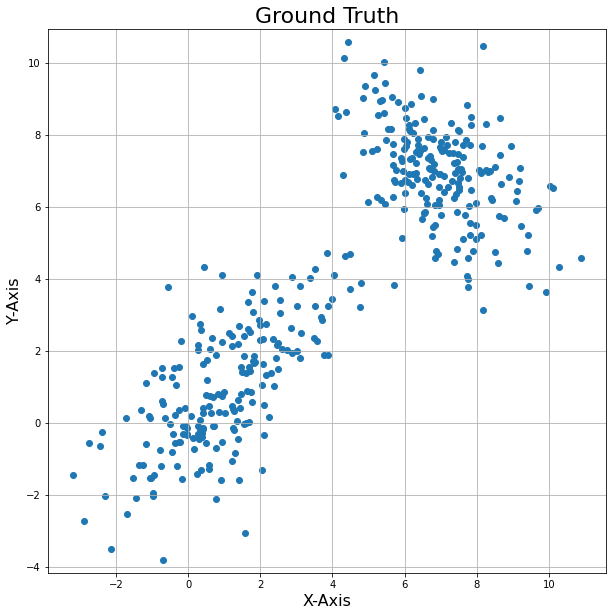

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(d[:,0], d[:,1], marker='o')
plt.axis('equal')
plt.xlabel('X-Axis', fontsize=16)
plt.ylabel('Y-Axis', fontsize=16)
plt.title('Ground Truth', fontsize=22)
plt.grid()
plt.show()

Here, we generate some guesses for the parameters of our data.
*   **Guide Question 4:** Why are we making guesses for our parameters for our given data? How does this factor in to the E-M algorithm?

In [ ]:
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

We can now display the initial clusters created by our given dataset and model. As can be seen, there is blue and orange lines, which shows how model attempts to create a "map" of sorts of the given data for the two clusters.

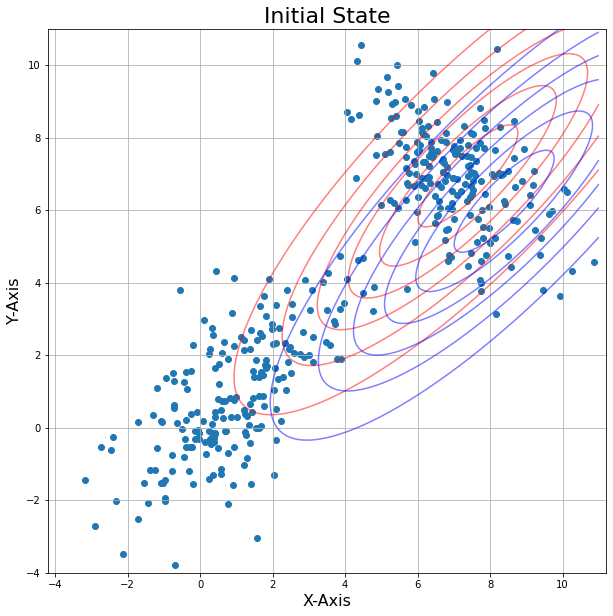

In [ ]:
x1 = np.linspace(-4,11,200)
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))
plt.scatter(d[:,0], d[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.axis('equal')
plt.xlabel('X-Axis', fontsize=16)
plt.ylabel('Y-Axis', fontsize=16)
plt.title('Initial State', fontsize=22)
plt.grid()
plt.show()

The set of code below is used to execute the Expectation step of the E-M algorithm.
*   **Guide Question 5:** What is done during the Expectation step of the E-M algorthm?

In [ ]:
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]

    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

The set of code below is used to execute the Maximization step of the E-M algorithm.
*   **Guide Question 6:** What is done during the **Maximization** step of the E-M algorthm?

In [ ]:
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)

    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

The code below will then allow us to plot the process of how the E-M algorithm will attempt to cluster the given data in our dataset. It will help showcase the steps that the algorithm is taking to slowly come up with the "best" cluster for the given data.

In [ ]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))

    plt.figure(figsize=(10,10))
    plt.scatter(d[:,0], d[:,1], marker='o')
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
    plt.axis('equal')
    plt.xlabel('X-Axis', fontsize=16)
    plt.ylabel('Y-Axis', fontsize=16)
    plt.grid()
    plt.show()

The last set of code will call the Expectation step and Maximization step, then display the results of that step as a graph. It will then repeat this process for 20 times or until the data covnerges. As seen on the last graph, this is now the "final" cluster of our given data.
*   **Guide Question 7:** In the E-M algorthm, what does **convergence** mean? Why do we need our clusters or data to converge?

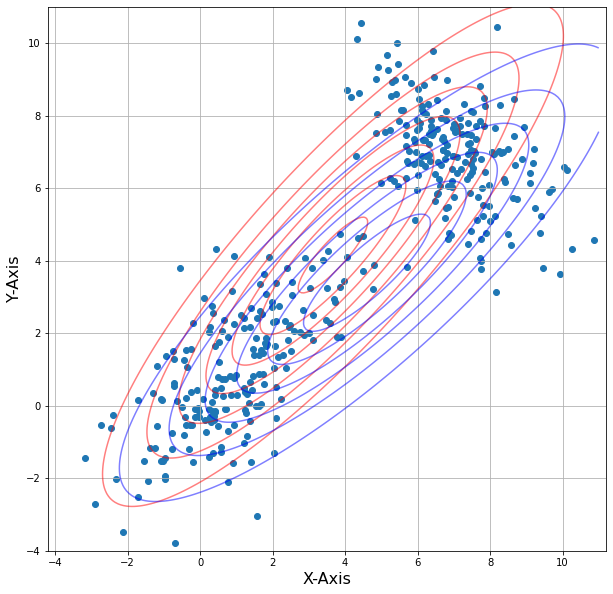

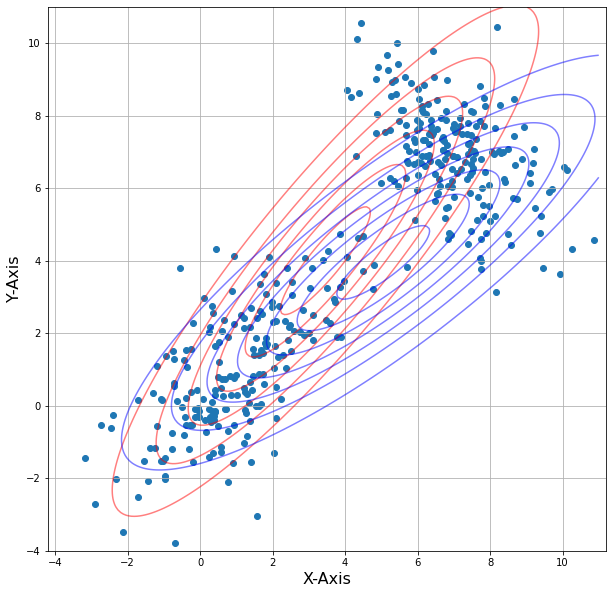

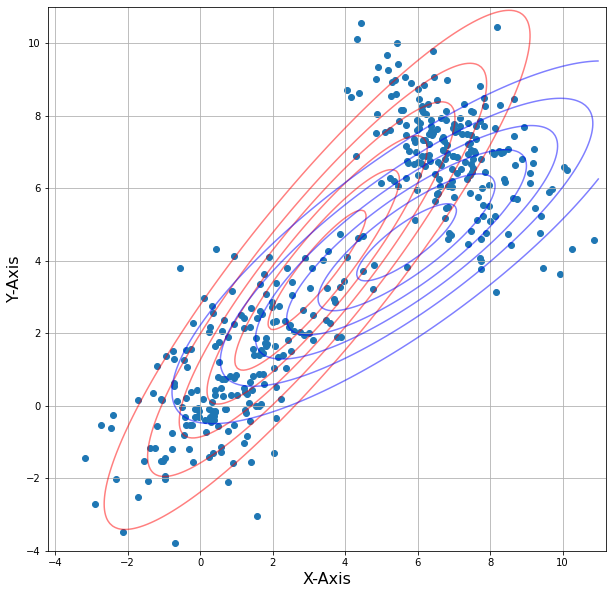

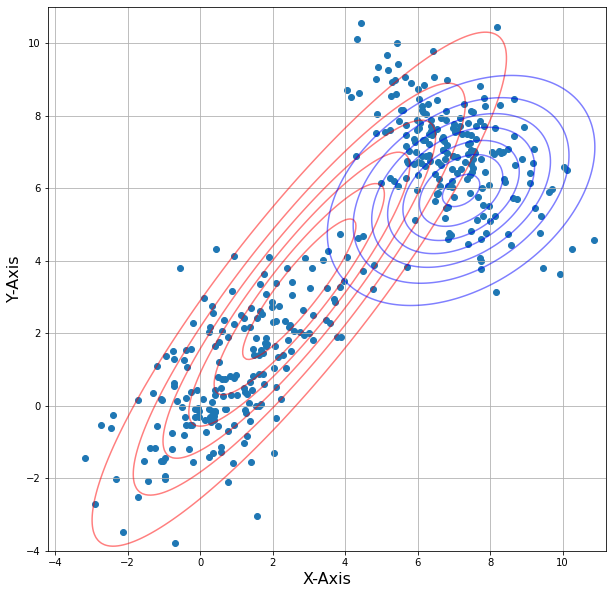

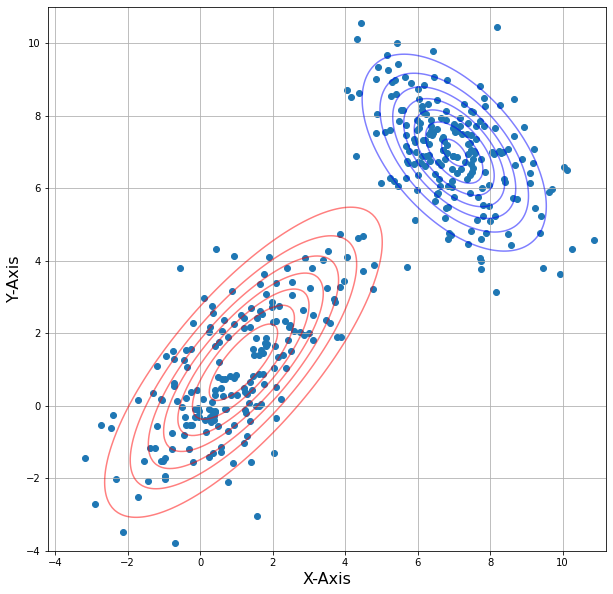

In [ ]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)